In [ ]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@28fe037d212663c6a24f373b94cc5d478c8c1a1d timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

Cloning into 'ImageBind'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 112 (delta 43), reused 33 (delta 33), pack-reused 51
Receiving objects: 100% (112/112), 2.64 MiB | 5.24 MiB/s, done.
Resolving deltas: 100% (50/50), done.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-req-build-mumeqpe4
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-req-build-mumeqpe4
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a2

In [ ]:
!pip install torch

In [ ]:
%cd /content/ImageBind

/content/ImageBind


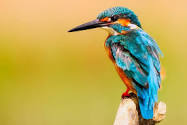

In [ ]:
import IPython
from PIL import Image

display(Image.open("../bird.jpeg"))

In [ ]:
%cd /content/ImageBind

/content/ImageBind


In [ ]:
import torch
from imagebind import data
from models import imagebind_model
from models.imagebind_model import ModalityType


device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

100%|██████████| 4.47G/4.47G [00:29<00:00, 164MB/s]


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [ ]:

inputs = {
    ModalityType.VISION: data.load_and_transform_vision_data(["../bird.jpeg"], device),
}

with torch.no_grad():
    embeddings = model(inputs)


In [ ]:
print(
    "Vision x Text: ",
    embeddings[ModalityType.VISION]
)

Vision x Text:  tensor([[-0.0233, -0.0036,  0.0332,  ..., -0.0319,  0.0215, -0.0058]],
       device='cuda:0')
